# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

### Step 3. Assign it to a variable apple

In [3]:
apple=pd.read_csv(url,sep=",")
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [5]:
apple["Date"]=pd.to_datetime(apple["Date"])

### Step 6.  Set the date as the index

In [6]:
apple.set_index("Date")

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [7]:
apple["Date"].duplicated().sum()

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [8]:
apple.sort_values(by="Date",ascending=True)

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


### Step 9. Get the last business day of each month

In [9]:
last_business_day = apple['Date'] + pd.offsets.BMonthEnd()
last_business_day

0      2014-07-31
1      2014-07-31
2      2014-07-31
3      2014-07-31
4      2014-07-31
          ...    
8460   1980-12-31
8461   1980-12-31
8462   1980-12-31
8463   1980-12-31
8464   1980-12-31
Name: Date, Length: 8465, dtype: datetime64[ns]

### Step 10.  What is the difference in days between the first day and the oldest

In [10]:
first_day=apple["Date"].min()
oldest_day=apple["Date"].max()
diff=(oldest_day-first_day).days
diff

12261

### Step 11.  How many months in the data we have?

In [11]:
months=apple["Date"].dt.to_period("M").nunique()
months

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

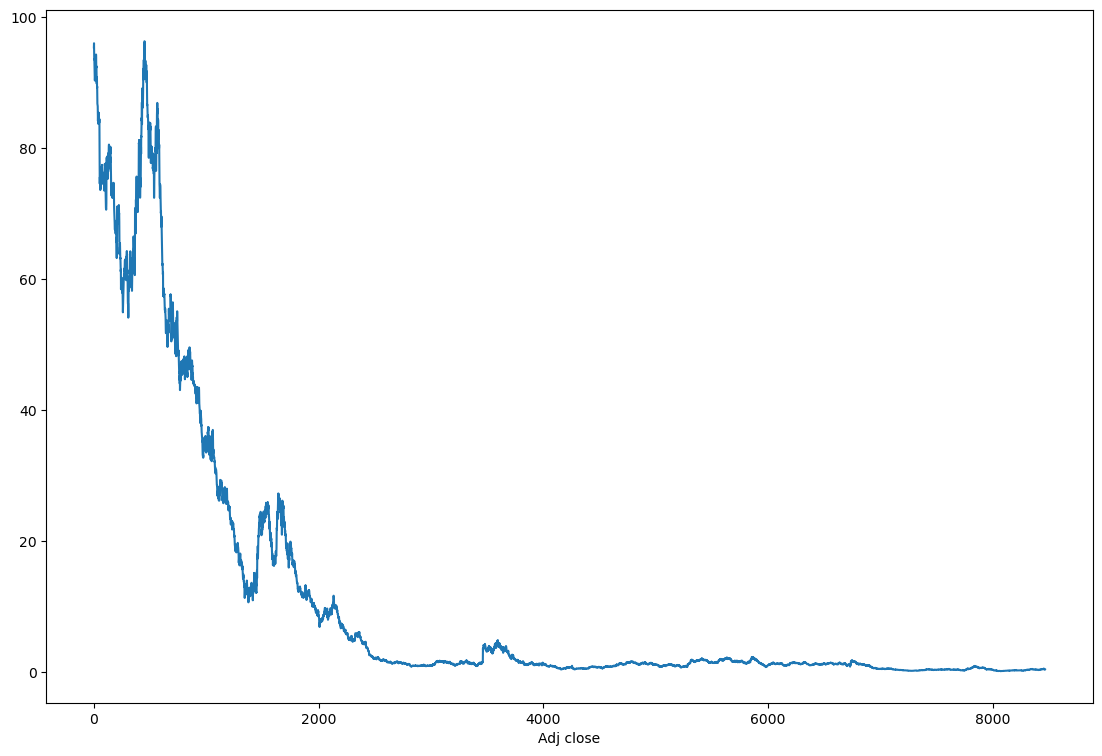

In [12]:
plt.figure(figsize=(13.5,9))
plt.plot(apple["Adj Close"])
plt.xlabel("Adj close")
plt.show()

### BONUS: Create your own question and answer it.